## 2. Análisis exploratorio

El archivo "uscecchini28.csv" del año 2000 es nuestro conjunto de datos final que contiene las etiquetas de fraude y las variables de características. 

El nombre de variable dependiente " misstate " (1 denota fraude y 0 denota no fraude). 

El resto de variables se clasifican en 2 tipos de variables: 
- Variables financieras: dch_wc, ch_rsst, dch_rec, dch_inv, soft_assets, ch_cs, ch_cm, ch_roa, issue, bm, dpi, reoa, EBIT, ch_fcf y new_p_aaer.
- Variables financieras calculadas: dch_wc, ch_rsst, dch_rec, dch_inv, soft_assets, ch_cs, ch_cm, ch_roa, issue, bm, dpi, reoa, EBIT y ch_fcf

La diferencia entre las dos es que las variables financieras calculadas son resultado de cálculos en base a las variables financieras. 

### Observaciones: 

La primera columna es el id que se crea como orden de datos, podemos borrarlos. 

Generalmente los datos de fraude suelen ser muy desbalanceados; muy pocos daros con positivo de fraude, por lo que, la elección del año 2000 va orientada hacia esa vía. Se trata del año con más fraude de los que tenemos. 

Para asegurarnos que nuestro modelo pueda predecir bien sin necesidad de la ayuda de los expertos y científicos del research, debe ser capaz de ofrecer óptimos resultados sin incluir las variables financieras calculadas, por tanto, debemos eliminarlas. 


In [1]:
# Importamos la librerías necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

# Ponemos la semilla
np.random.seed(0)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importamos el dataset 
df = pd.read_csv('clean_uscecchini282001.csv')

In [3]:
df

,Unnamed: 0,fyear,gvkey,sich,insbnk,understatement,option,p_aaer,new_p_aaer,misstate,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,0,2001,1004,5080.0,0,0,0,2620.5,26206.0,0,...,0.806937,-0.237810,-0.041361,-0.109166,1,0.850908,0.810264,0.196569,-0.110435,-0.040463
1,1,2001,1013,3661.0,0,0,0,2620.5,26206.0,0,...,0.585630,-0.057784,-0.221346,-0.705712,1,0.525419,0.794947,0.198264,-0.764852,-0.197645
2,2,2001,1019,7380.0,0,0,0,2620.5,26206.0,0,...,0.552406,-0.010586,-0.174932,-0.017400,1,0.302762,0.995767,0.374432,0.086782,0.017890
3,3,2001,1021,3861.0,0,0,0,2620.5,26206.0,0,...,0.906427,-0.054862,0.136006,-0.108574,0,0.915826,0.792151,-1.033237,-0.148929,0.056513
4,4,2001,1034,2834.0,0,0,0,2620.5,26206.0,0,...,0.792009,0.133198,-0.207014,-0.059023,1,0.760628,1.140997,-0.006470,0.003356,-0.091539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,6357,2001,233149,4899.0,0,0,0,2620.5,26206.0,0,...,0.841115,0.665356,-0.233796,-0.278447,1,0.719467,0.807300,-0.258992,-0.218409,-0.393693
6358,6358,2001,233397,4813.0,0,0,0,2620.5,26206.0,0,...,0.225108,3.768149,-1.085016,-0.091807,1,-0.075099,0.579202,-0.381579,-0.041988,-0.233517
6359,6359,2001,241216,2870.0,0,0,0,2620.5,26206.0,0,...,0.753478,0.537465,0.203494,-0.058259,1,0.760299,0.536431,-0.016995,0.032870,-0.064820
6360,6360,2001,244818,3760.0,0,0,0,2620.5,26206.0,0,...,0.080238,-6.484197,-1.162185,-0.432618,1,0.010383,1.223529,-2.199320,-0.751347,0.269884


In [4]:
df.describe()

,Unnamed: 0,fyear,gvkey,sich,insbnk,understatement,option,p_aaer,new_p_aaer,misstate,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
count,6362.000000,6362.0,6362.000000,6362.000000,6362.000000,6362.0,6362.000000,6362.000000,6362.000000,6362.000000,...,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000
mean,3180.500000,2001.0,51533.052814,4617.390286,0.029550,0.0,0.002043,2619.295898,26193.959447,0.012732,...,0.512074,0.169738,-0.125502,-0.035739,0.846903,0.424107,0.981580,-4.038400,-0.442184,0.084133
std,1836.695538,0.0,48883.270349,2054.711693,0.169357,0.0,0.045161,49.059705,490.600758,0.112124,...,0.268224,1.358681,2.914256,0.422822,0.360109,1.708656,0.455374,13.988490,1.316916,0.630566
min,0.000000,2001.0,1004.000000,100.000000,0.000000,0.0,0.000000,1555.000000,15551.000000,0.000000,...,0.004515,-6.484197,-17.359699,-1.671565,0.000000,-7.034304,0.151757,-89.013245,-7.016393,-2.980601
25%,1590.250000,2001.0,12173.750000,3367.500000,0.000000,0.0,0.000000,2620.500000,26206.000000,0.000000,...,0.289908,-0.114386,-0.255000,-0.098821,1.000000,0.144450,0.808920,-1.559872,-0.310370,-0.092971
50%,3180.500000,2001.0,28842.500000,3826.000000,0.000000,0.0,0.000000,2620.500000,26206.000000,0.000000,...,0.531885,0.058568,-0.023205,-0.012320,1.000000,0.457227,0.950906,-0.099258,-0.003308,-0.013038
75%,4770.750000,2001.0,66247.750000,6162.000000,0.000000,0.0,0.000000,2620.500000,26206.000000,0.000000,...,0.731598,0.219046,0.164809,0.023827,1.000000,0.924086,1.042146,0.189597,0.085622,0.114287
max,6361.000000,2001.0,277918.000000,9997.000000,1.000000,0.0,1.000000,3855.000000,38551.000000,1.000000,...,0.993599,9.600000,16.573810,1.621628,1.000000,4.937457,4.036458,0.784573,0.550619,4.061810


#### Elección del año 2000

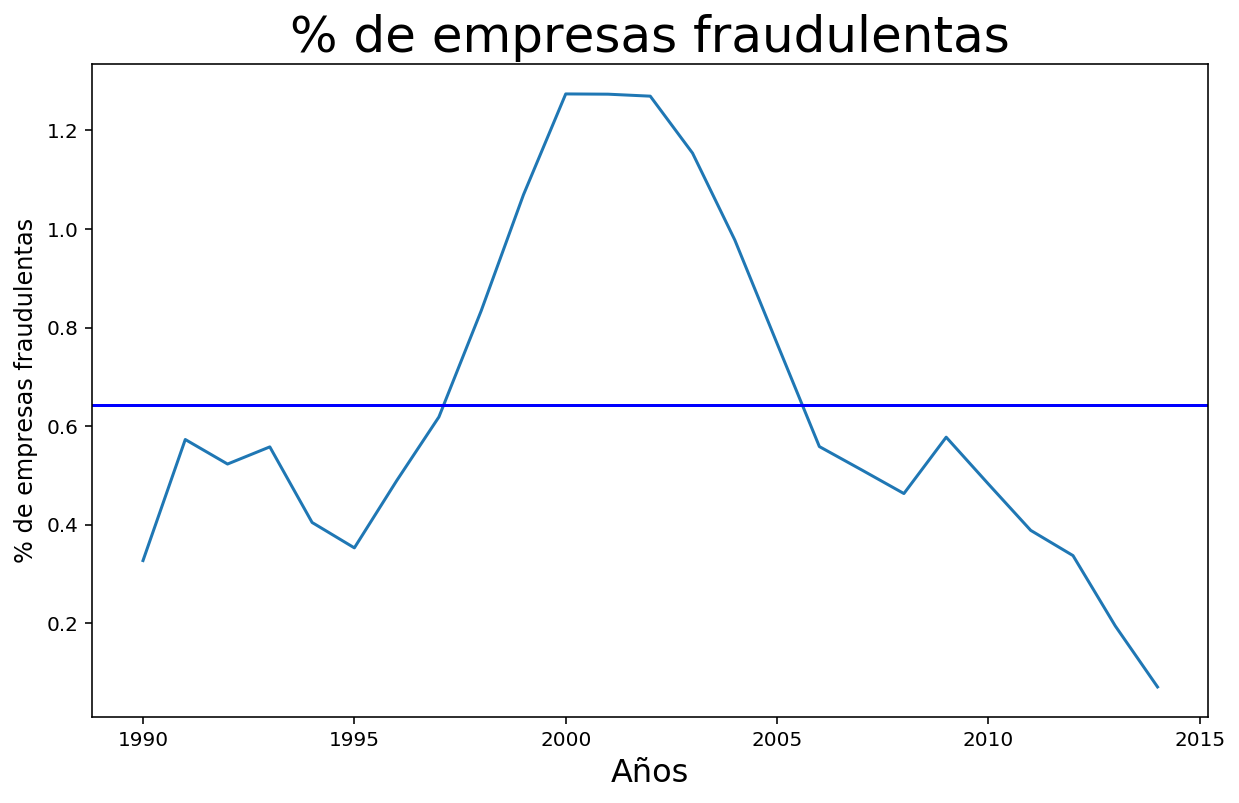

In [5]:
# Graficamos % de positivos de fraude por año: 1990-2014
years = list(df2.fyear.unique())
fraud_per_year = []

for year in years:
    fraud_per_year.append((df2[df2['fyear'] == year].groupby('gvkey').agg({'misstate':'sum'})
                           .sum()/len(df2[df2['fyear'] == year].groupby('gvkey').agg({'misstate':'sum'}))*100))


plt.figure(figsize=(10,6))
plt.plot(years, fraud_per_year)
plt.xlabel('Años', fontsize=16)
plt.ylabel('% de empresas fraudulentas', fontsize=12)
plt.title('% de empresas fraudulentas', fontsize=25)
plt.axhline(y=np.mean(fraud_per_year), color='Blue')
plt.show()

In [6]:
# Media de empresas fraudlentas por año 1990-2014
print ("Media de empresas fraudlentas por año : ", np.mean(fraud_per_year))

Media de empresas fraudlentas por año :  0.6419889297735921


Como se puede observar en la gráfica, el tramo con mas fraude es entre el 2000 y el 2001, asi que vamos a ver la media del año 2000.

In [7]:
# Graficamos la cantidad de positivos de fraude por año: 2000

years = list(df.fyear.unique())
fraud_per_year = []

for year in years:
    fraud_per_year.append((df[df['fyear'] == year].groupby('gvkey').agg({'misstate':'sum'})
                           .sum()/len(df[df['fyear'] == year].groupby('gvkey').agg({'misstate':'sum'}))*100))

In [8]:
# Media de empresas fraudlentas por año 2000
print ("Media de empresas fraudlentas en el año 2000: ", np.mean(fraud_per_year))

Media de empresas fraudlentas en el año 2000:  1.273184533165671


Como se puede observar, la cantidad de positivos por fraude en un año nos indica que es mejor elegir el año 2000, dada la tipología de los datos. 

#### Datos desbalanceados y análisis de la variable dependiente: "misstate"

In [9]:
# Ver si nuestro dataset esta desbalanceado o no. 
classes = df["misstate"]
classes.value_counts()

0    6281
1      81
Name: misstate, dtype: int64

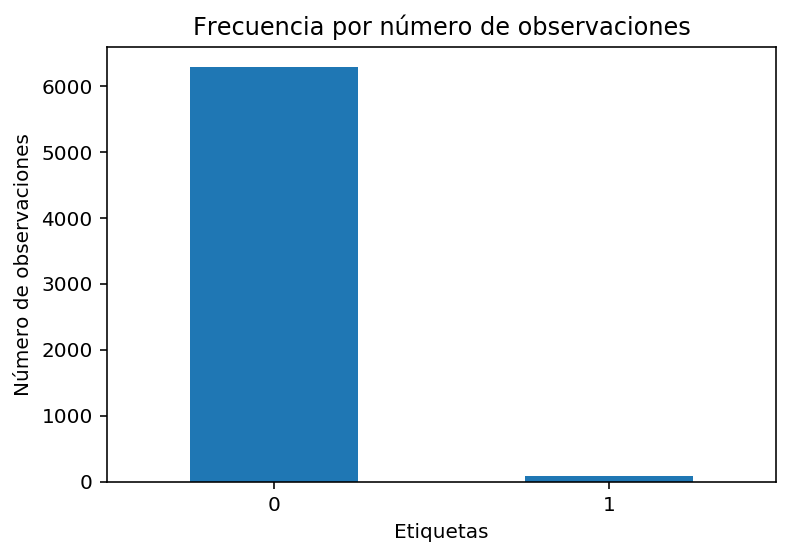

In [10]:
count_classes = pd.value_counts(df['misstate'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia por número de observaciones")
plt.xlabel("Etiquetas")
plt.ylabel("Número de observaciones");

Como muestran los datos, tenemos un dataset muy desbalanceado. En el preproceso estudiaremos diferentes técnicas para tratar el problema del desbalanceo de la variable dependiente como Oversampling o Undersampling.

In [11]:
# Eliminar la columna ID y Year: tienen poca importancia para el modelo 
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop("fyear", axis = 1)

- Eliminamos las **Variables financieras calculadas**: dch_wc, ch_rsst, dch_rec, dch_inv, soft_assets, ch_cs, ch_cm, ch_roa, issue, bm, dpi, reoa, EBIT y ch_fcf.

In [12]:
# Variables financieras calculadas
df.drop(columns=['dch_wc','ch_rsst','dch_rec','dch_inv','soft_assets'
                 ,'ch_cs','ch_cm', 'ch_roa','issue','bm','dpi','reoa','EBIT', 'ch_fcf'], inplace=True)

In [13]:
df

,gvkey,sich,insbnk,understatement,option,p_aaer,new_p_aaer,misstate,act,ap,...,ppegt,pstk,re,rect,sale,sstk,txp,txt,xint,prcc_f
0,1004,5080.0,0,0,0,2620.5,26206.0,0,436.656,49.529,...,198.225,0.000,139.603,77.528,638.721,34.334,3.847,-39.290,19.798,11.44
1,1013,3661.0,0,0,0,2620.5,26206.0,0,1305.200,162.000,...,1011.300,0.000,495.600,280.700,2402.800,40.400,0.000,-633.000,8.800,4.55
2,1019,7380.0,0,0,0,2620.5,26206.0,0,11.860,2.787,...,51.984,0.000,11.546,9.359,45.050,0.000,0.398,1.217,0.169,253.00
3,1021,3861.0,0,0,0,2620.5,26206.0,0,6.494,0.983,...,3.359,0.000,-8.922,2.677,24.051,0.000,0.000,0.013,0.439,0.32
4,1034,2834.0,0,0,0,2620.5,26206.0,0,662.521,171.275,...,700.019,0.000,-15.463,259.246,974.990,5.545,15.429,0.613,45.321,26.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,233149,4899.0,0,0,0,2620.5,26206.0,0,71.622,21.837,...,68.644,0.000,-94.610,43.605,159.284,19.001,8.838,0.431,7.483,6.50
6358,233397,4813.0,0,0,0,2620.5,26206.0,0,371.861,158.127,...,554.200,0.000,-365.347,83.187,196.061,0.703,3.409,6.178,121.785,5.60
6359,241216,2870.0,0,0,0,2620.5,26206.0,0,4320.000,687.000,...,4415.000,0.000,-182.000,2102.000,6323.000,3.000,220.000,76.000,242.000,10.60
6360,244818,3760.0,0,0,0,2620.5,26206.0,0,3.413,0.179,...,0.175,0.000,-7.757,0.170,0.353,1.555,0.000,0.000,0.000,14.85


### Informe: 


-	Se eliminado las variables Id y Year por su poca importancia para el modelo. 
-	El establecimiento del año 2000 para la elección de los datos y posterior análisis del desbalanceo de la variable dependiente y posibles soluciones. 
-	Eliminación de las Variables financieras calculadas.


Después de aplicar los procesos necesarios, vamos a guardar nuestro dataframe para ser usado en la siguiente fase de Pre-procesing


In [15]:
# Lo guardamos 
df.to_csv('Explor_uscecchini28.csv')